In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import scipy as sp
import scipy.interpolate
import os
import sys
from mpl_styles import analytic
sys.path.insert(0, '/Users/jtlaune/athena/vis/python')
import athena_read
import yt
%matplotlib inline

/Users/jtlaune/Science/lib/python3.11/site-packages/yt/sample_data/api.py:144: UserWarning: Storage directory from yt config doesn't exist (currently set to '/does/not/exist'). Current working directory will be used instead.
  warn(


FileNotFoundError: No such file or directory: '/home/astrosun/jtlaune/PrelimProductRun/JTrunII_Acc/ppd_cyl.out1.00000.athdf'.

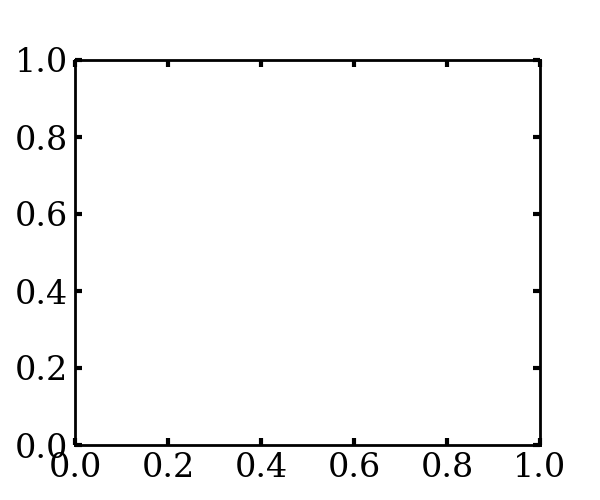

In [2]:
with mpl.rc_context(analytic):
    fig, ax = plt.subplots()
    for iout in [0,100, 150, 160, 170, 180]:
        ds = yt.load(f"/home/astrosun/jtlaune/PrelimProductRun/JTrunII_Acc/ppd_cyl.out1.{iout:05}.athdf")
        dd = ds.all_data()
        dd["athena_pp","dens"].shape
        rg = np.linspace(0.4,1.6,1000)
        pg = np.linspace(-np.pi,np.pi,6000)
        rr, pp = np.meshgrid(rg,pg)
        densg = sp.interpolate.griddata(dd.fcoords[:,:2],dd["athena_pp","dens"],(rr,pp),method="linear")
        densg = np.nan_to_num(densg,0)
        ax.plot(rg[2:-2],np.mean(densg,axis=0)[2:-2],label=f"T={iout} orbits")

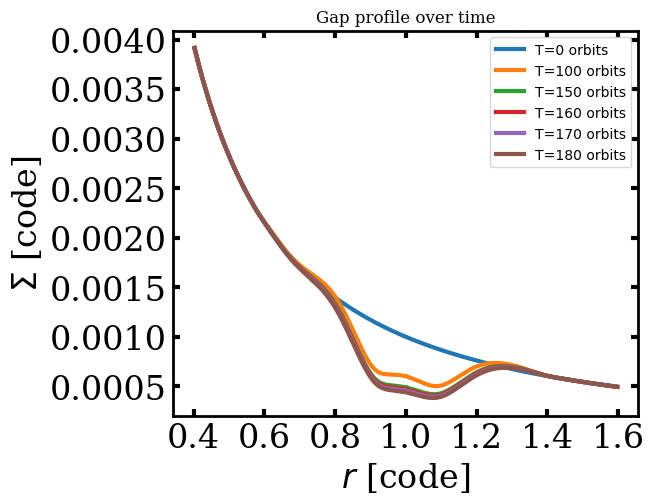

In [8]:
ax.legend()
ax.set_ylabel(r"$\Sigma$ [code]")
ax.set_xlabel(r"$r$ [code]")
ax.set_title("Gap profile over time")
fig